## **Cleaning Data** 

## Import libraries

In [ ]:
# Installing required packages
!pip install pyspark
!pip install findspark
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd 
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd
from pyspark import SparkContext, SparkConf
import plotly.express as  px



# Read dataset

In [ ]:
music = pd.read_csv("music_genre_dataset.csv")


# Type of attributes 

In [ ]:
music.dtypes


Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

# missing percentage  per attribute 

In [ ]:
missing_values = music.isna().sum()/len(music)*100
missing_values

Artist Name            0.000000
Track Name             0.000000
Popularity             2.539151
danceability           0.000000
energy                 0.000000
key                   11.232841
loudness               0.000000
mode                   0.000000
speechiness            0.000000
acousticness           0.000000
instrumentalness      23.116582
liveness               0.000000
valence                0.000000
tempo                  0.000000
duration_in min/ms     0.000000
time_signature         0.000000
Class                  0.000000
dtype: float64

In [ ]:
music.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,15123.000000,15517.000000,15517.000000,13774.000000,15517.000000,15517.000000,15517.000000,15517.000000,11930.000000,15517.000000,15517.000000,15517.000000,1.551700e+04,15517.000000,15517.000000
mean,45.582358,0.541469,0.668711,5.964281,-7.856428,0.652639,0.080936,0.238502,0.177348,0.196837,0.487344,122.833548,1.992960e+05,3.925114,6.564155
std,17.400843,0.166838,0.235402,3.196333,4.018688,0.476147,0.084977,0.309605,0.302935,0.160212,0.240228,29.686429,1.148326e+05,0.360904,3.258829
min,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,34.000000,0.430000,0.517000,3.000000,-9.483000,0.000000,0.035100,0.003380,0.000097,0.097400,0.298000,99.729000,1.632400e+05,4.000000,5.000000
50%,45.000000,0.543000,0.708000,6.000000,-6.971000,1.000000,0.048300,0.068100,0.004215,0.129000,0.484000,120.065000,2.084270e+05,4.000000,8.000000
75%,57.000000,0.656000,0.866000,9.000000,-5.150000,1.000000,0.084800,0.410000,0.203000,0.260000,0.674000,142.378000,2.522530e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


## Handling missing  values in Popularity by drop rows since it's small percentage that missing

In [ ]:
music=music.dropna(subset=['Popularity'])


In [ ]:
missing_values = music.isna().sum()/len(music)*100
missing_values

Artist Name            0.000000
Track Name             0.000000
Popularity             0.000000
danceability           0.000000
energy                 0.000000
key                   11.175031
loudness               0.000000
mode                   0.000000
speechiness            0.000000
acousticness           0.000000
instrumentalness      23.004695
liveness               0.000000
valence                0.000000
tempo                  0.000000
duration_in min/ms     0.000000
time_signature         0.000000
Class                  0.000000
dtype: float64

# Handling missing values in key and  instrumentalness 

In [ ]:
#key 
imp = IterativeImputer(missing_values=np.nan,
                       max_iter=20,tol=0.001)
imp.fit(music[['key']])
music['key'] = data=imp.transform(music[['key']]).ravel()


# instrumentalness 
imp = IterativeImputer(missing_values=np.nan,
                       max_iter=20,tol=0.001)
imp.fit(music[['instrumentalness']])
music['instrumentalness'] = data=imp.transform(music[['instrumentalness']]).ravel()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
missing_values = music.isna().sum()/len(music)*100
missing_values

Artist Name           0.0
Track Name            0.0
Popularity            0.0
danceability          0.0
energy                0.0
key                   0.0
loudness              0.0
mode                  0.0
speechiness           0.0
acousticness          0.0
instrumentalness      0.0
liveness              0.0
valence               0.0
tempo                 0.0
duration_in min/ms    0.0
time_signature        0.0
Class                 0.0
dtype: float64

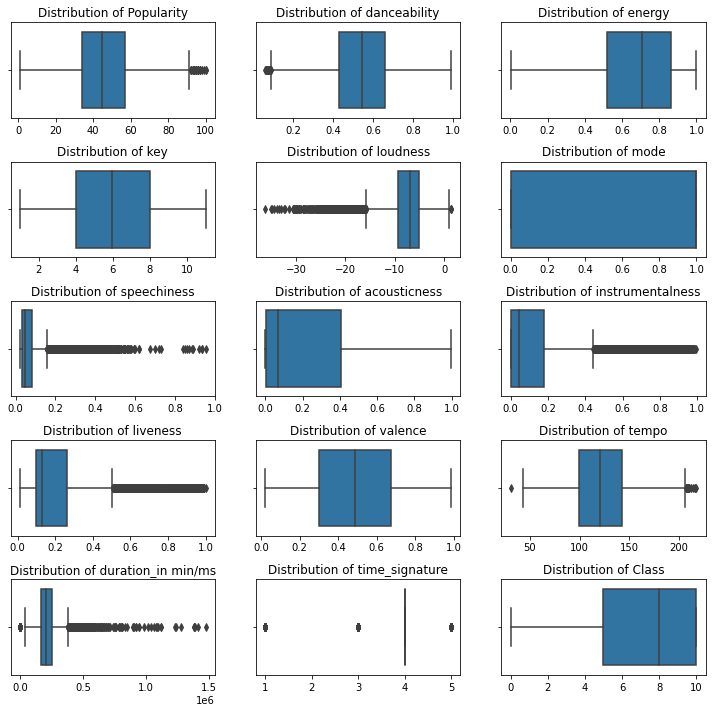

In [ ]:
music_cleaned = music.select_dtypes([int, float])

fig=plt.figure(figsize=(10,10))
for i ,columns in enumerate (music_cleaned,1):
    ax= plt.subplot(5,3,i)
    sns.boxplot(data= music_cleaned , x=music_cleaned[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)
plt.show()



In [ ]:
songs = music
songs

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.000000,-4.964,1,0.0485,0.017100,0.177360,0.0849,0.8990,134.071,234596.000000,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.000000,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.000000,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.000000,-6.528,0,0.0555,0.021200,0.177360,0.1220,0.5690,107.033,173968.000000,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.000000,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15512,Television,Marquee Moon - Remastered,47.0,0.494,0.657,7.000000,-7.543,1,0.0397,0.063200,0.449000,0.0849,0.7370,118.194,645000.000000,4,1
15513,Hulkoff,Martialisk - Svitjod Edition,39.0,0.487,0.984,1.000000,-4.790,1,0.1610,0.000439,0.023400,0.3540,0.2910,120.031,225627.000000,4,8
15514,"Red Garland, Paul Chambers, Art Taylor",Almost Like Being In Love,57.0,0.561,0.346,5.969031,-12.596,0,0.0409,0.873000,0.399000,0.1040,0.6970,93.689,4.838217,4,7
15515,Squid,Sludge,41.0,0.391,0.835,7.000000,-4.944,1,0.0702,0.004850,0.005140,0.1180,0.1090,129.024,300820.000000,4,6


In [ ]:
songs=songs.drop_duplicates()
songs

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.000000,-4.964,1,0.0485,0.017100,0.177360,0.0849,0.8990,134.071,234596.000000,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.000000,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.000000,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.000000,-6.528,0,0.0555,0.021200,0.177360,0.1220,0.5690,107.033,173968.000000,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.000000,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15512,Television,Marquee Moon - Remastered,47.0,0.494,0.657,7.000000,-7.543,1,0.0397,0.063200,0.449000,0.0849,0.7370,118.194,645000.000000,4,1
15513,Hulkoff,Martialisk - Svitjod Edition,39.0,0.487,0.984,1.000000,-4.790,1,0.1610,0.000439,0.023400,0.3540,0.2910,120.031,225627.000000,4,8
15514,"Red Garland, Paul Chambers, Art Taylor",Almost Like Being In Love,57.0,0.561,0.346,5.969031,-12.596,0,0.0409,0.873000,0.399000,0.1040,0.6970,93.689,4.838217,4,7
15515,Squid,Sludge,41.0,0.391,0.835,7.000000,-4.944,1,0.0702,0.004850,0.005140,0.1180,0.1090,129.024,300820.000000,4,6


# Feature Engineering 

In [ ]:
songs = songs.rename(columns = {'Artist Name':'Artist_Name'})
songs = songs.rename(columns = {'Track Name':'Track_Name'})
songs = songs.rename(columns = {'duration_in min/ms':'duration_in_min/ms'})

In [ ]:
songs['danceability'] =np.multiply(songs['danceability'],100)
songs['energy'] =np.multiply(songs['energy'],100)
songs


,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,85.4,56.4,1.000000,-4.964,1,0.0485,0.017100,0.177360,0.0849,0.8990,134.071,234596.000000,4,5
1,Boston,Hitch a Ride,54.0,38.2,81.4,3.000000,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10
2,The Raincoats,No Side to Fall In,35.0,43.4,61.4,6.000000,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,85.3,59.7,10.000000,-6.528,0,0.0555,0.021200,0.177360,0.1220,0.5690,107.033,173968.000000,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,16.7,97.5,2.000000,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15512,Television,Marquee Moon - Remastered,47.0,49.4,65.7,7.000000,-7.543,1,0.0397,0.063200,0.449000,0.0849,0.7370,118.194,645000.000000,4,1
15513,Hulkoff,Martialisk - Svitjod Edition,39.0,48.7,98.4,1.000000,-4.790,1,0.1610,0.000439,0.023400,0.3540,0.2910,120.031,225627.000000,4,8
15514,"Red Garland, Paul Chambers, Art Taylor",Almost Like Being In Love,57.0,56.1,34.6,5.969031,-12.596,0,0.0409,0.873000,0.399000,0.1040,0.6970,93.689,4.838217,4,7
15515,Squid,Sludge,41.0,39.1,83.5,7.000000,-4.944,1,0.0702,0.004850,0.005140,0.1180,0.1090,129.024,300820.000000,4,6


In [ ]:
# convert all durations into Minutes
songs['duration_in_min'] =songs['duration_in_min/ms']
c=np.array(songs['duration_in_min'])
d=np.array(songs['duration_in_min'])
songs['duration_in_min'] =np.divide(d,60000,out= c,where=(songs['duration_in_min']>1000))
songs


,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,Class,duration_in_min
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,85.4,56.4,1.000000,-4.964,1,0.0485,0.017100,0.177360,0.0849,0.8990,134.071,234596.000000,4,5,3.909933
1,Boston,Hitch a Ride,54.0,38.2,81.4,3.000000,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10,4.195550
2,The Raincoats,No Side to Fall In,35.0,43.4,61.4,6.000000,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6,1.827783
3,Deno,Lingo (feat. J.I & Chunkz),66.0,85.3,59.7,10.000000,-6.528,0,0.0555,0.021200,0.177360,0.1220,0.5690,107.033,173968.000000,4,5,2.899467
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,16.7,97.5,2.000000,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10,3.832667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15512,Television,Marquee Moon - Remastered,47.0,49.4,65.7,7.000000,-7.543,1,0.0397,0.063200,0.449000,0.0849,0.7370,118.194,645000.000000,4,1,10.750000
15513,Hulkoff,Martialisk - Svitjod Edition,39.0,48.7,98.4,1.000000,-4.790,1,0.1610,0.000439,0.023400,0.3540,0.2910,120.031,225627.000000,4,8,3.760450
15514,"Red Garland, Paul Chambers, Art Taylor",Almost Like Being In Love,57.0,56.1,34.6,5.969031,-12.596,0,0.0409,0.873000,0.399000,0.1040,0.6970,93.689,4.838217,4,7,4.838217
15515,Squid,Sludge,41.0,39.1,83.5,7.000000,-4.944,1,0.0702,0.004850,0.005140,0.1180,0.1090,129.024,300820.000000,4,6,5.013667


In [ ]:
songs['boringness'] = songs[['tempo' , ('energy') ,('danceability')]].sum(axis=1)
songs

,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,Class,duration_in_min,boringness
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,85.4,56.4,1.000000,-4.964,1,0.0485,0.017100,0.177360,0.0849,0.8990,134.071,234596.000000,4,5,3.909933,275.871
1,Boston,Hitch a Ride,54.0,38.2,81.4,3.000000,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10,4.195550,236.054
2,The Raincoats,No Side to Fall In,35.0,43.4,61.4,6.000000,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6,1.827783,252.481
3,Deno,Lingo (feat. J.I & Chunkz),66.0,85.3,59.7,10.000000,-6.528,0,0.0555,0.021200,0.177360,0.1220,0.5690,107.033,173968.000000,4,5,2.899467,252.033
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,16.7,97.5,2.000000,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10,3.832667,313.260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15512,Television,Marquee Moon - Remastered,47.0,49.4,65.7,7.000000,-7.543,1,0.0397,0.063200,0.449000,0.0849,0.7370,118.194,645000.000000,4,1,10.750000,233.294
15513,Hulkoff,Martialisk - Svitjod Edition,39.0,48.7,98.4,1.000000,-4.790,1,0.1610,0.000439,0.023400,0.3540,0.2910,120.031,225627.000000,4,8,3.760450,267.131
15514,"Red Garland, Paul Chambers, Art Taylor",Almost Like Being In Love,57.0,56.1,34.6,5.969031,-12.596,0,0.0409,0.873000,0.399000,0.1040,0.6970,93.689,4.838217,4,7,4.838217,184.389
15515,Squid,Sludge,41.0,39.1,83.5,7.000000,-4.944,1,0.0702,0.004850,0.005140,0.1180,0.1090,129.024,300820.000000,4,6,5.013667,251.624


# point 2

## **Visualization**

In [ ]:
artist=songs.query('Popularity>90')

# visualise how varied are the songs of the top 3 popular Artists

In [ ]:
import matplotlib.pyplot as plt
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
output_notebook()

# show The most popular artist 

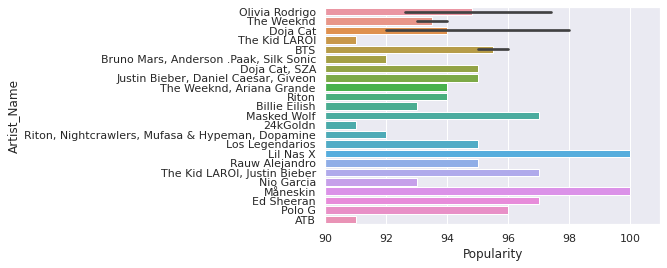

In [ ]:
import matplotlib.pyplot as plt 
plt.xlim( artist["Popularity"].min()-1,artist["Popularity"].max()+1)
sns.barplot(y = "Artist_Name",x= "Popularity",\
            data= artist)

In [ ]:
ar=artist.groupby(['Artist_Name'])['Popularity'].mean()
print(ar)


Artist_Name
24kGoldn                                             91.0
ATB                                                  91.0
BTS                                                  95.5
Billie Eilish                                        93.0
Bruno Mars, Anderson .Paak, Silk Sonic               92.0
Doja Cat                                             94.0
Doja Cat, SZA                                        95.0
Ed Sheeran                                           97.0
Justin Bieber, Daniel Caesar, Giveon                 95.0
Lil Nas X                                           100.0
Los Legendarios                                      95.0
Masked Wolf                                          97.0
Måneskin                                            100.0
Nio Garcia                                           93.0
Olivia Rodrigo                                       94.8
Polo G                                               96.0
Rauw Alejandro                                       95.0
Ri

In [ ]:
hover_tool = HoverTool()
f = figure(tools=[hover_tool,'crosshair'])
x = np.arange(1,len(artist['Artist_Name'].unique())+1)
width = 0.1
f.vbar(x=x-width, top= ar,bottom=0,width=width,color='#F5CB5C')

f.xaxis.major_label_overrides = {x:y for (x,y) in enumerate(artist['Artist_Name'])}
show(f)


The sad songs that have gained a huge popularity despite it's a sad song 

In [ ]:
class_sad=songs.query('valence<0.50 ')
class_sad


,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,Class,duration_in_min,boringness
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,16.7,97.5,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10,3.832667,313.260
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,23.5,97.7,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.000000,4,6,3.468883,274.152
7,Randy Travis,On the Other Hand,55.0,65.7,41.5,5.0,-9.915,1,0.0250,0.175000,0.000006,0.1320,0.3470,96.030,3.105783,4,4,3.105783,203.230
8,Professional Murder Music,Slow,29.0,43.1,77.6,10.0,-5.403,1,0.0527,0.000022,0.001300,0.1790,0.3180,120.857,237867.000000,4,8,3.964450,241.557
10,Arctic Monkeys,The View From The Afternoon,59.0,38.7,92.2,9.0,-5.192,0,0.0674,0.004870,0.177360,0.1870,0.4170,146.478,222947.000000,4,10,3.715783,277.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,Radiohead,Just,63.0,29.1,76.7,7.0,-6.913,0,0.0862,0.000401,0.012000,0.0763,0.3590,175.702,234800.000000,4,10,3.913333,281.502
15511,Ashe,Till Forever Falls Apart,80.0,50.9,49.8,2.0,-6.940,1,0.0315,0.413000,0.177360,0.0674,0.2830,99.729,222861.000000,4,9,3.714350,200.429
15513,Hulkoff,Martialisk - Svitjod Edition,39.0,48.7,98.4,1.0,-4.790,1,0.1610,0.000439,0.023400,0.3540,0.2910,120.031,225627.000000,4,8,3.760450,267.131
15515,Squid,Sludge,41.0,39.1,83.5,7.0,-4.944,1,0.0702,0.004850,0.005140,0.1180,0.1090,129.024,300820.000000,4,6,5.013667,251.624


#The 7 class the one that have sadest songs according to percentage of valence

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


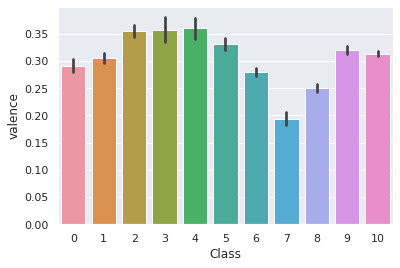

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x =class_sad['Class']
y = class_sad['valence']

sns.barplot(x, y)
plt.show()

In [ ]:
negative=songs.query('valence<0.50 and Popularity >90')
negative

,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,Class,duration_in_min,boringness
1505,The Kid LAROI,WITHOUT YOU,91.0,66.2,41.3,5.969031,-7.357,1,0.0299,0.2130,0.177360,0.1340,0.4670,93.005,161385.000000,4,9,2.689750,200.505
2878,Olivia Rodrigo,traitor,94.0,38.0,33.9,3.000000,-7.885,1,0.0338,0.6910,0.177360,0.1200,0.0849,100.607,3.820450,4,9,3.820450,172.507
5851,"Justin Bieber, Daniel Caesar, Giveon",Peaches (feat. Daniel Caesar & Giveon),95.0,67.7,69.6,5.969031,-6.181,1,0.1190,0.3210,0.177360,0.4200,0.4640,90.030,3.301367,4,9,3.301367,227.330
5910,Olivia Rodrigo,deja vu,95.0,43.9,61.0,9.000000,-7.236,1,0.1160,0.5930,0.000011,0.3410,0.1720,181.088,215508.000000,4,9,3.591800,285.988
6853,Billie Eilish,Your Power,93.0,63.4,28.5,9.000000,-14.007,0,0.0807,0.9370,0.000359,0.2320,0.2030,129.650,245897.000000,4,9,4.098283,221.550
7183,Masked Wolf,Astronaut In The Ocean,97.0,77.8,69.5,4.000000,-6.865,0,0.0913,0.1750,0.177360,0.1500,0.4720,149.996,132780.000000,4,9,2.213000,297.296
9886,Doja Cat,Streets,92.0,74.9,46.3,11.000000,-8.433,1,0.0828,0.2080,0.037100,0.3370,0.1900,90.028,226987.000000,4,5,3.783117,211.228
11027,Doja Cat,Streets,92.0,74.9,46.3,11.000000,-8.433,1,0.0828,0.2080,0.037100,0.3370,0.1900,90.028,226987.000000,4,9,3.783117,211.228
11299,Rauw Alejandro,Todo De Ti,95.0,78.0,71.8,3.000000,-3.605,0,0.0506,0.3100,0.000163,0.0932,0.3420,127.949,3.326733,4,9,3.326733,277.749
11418,Olivia Rodrigo,drivers license,95.0,58.5,43.6,10.000000,-8.761,1,0.0601,0.7210,0.000013,0.1050,0.1320,143.874,242014.000000,4,9,4.033567,245.974


# Show the Most popular negative songs

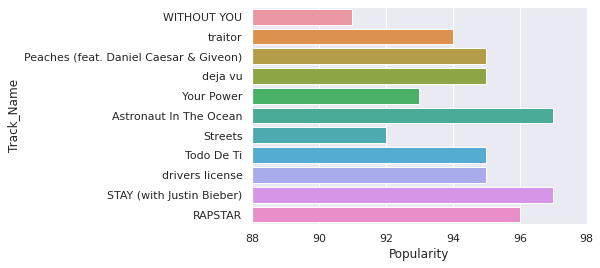

In [ ]:
import matplotlib.pyplot as plt 
plt.xlim( negative["Popularity"].min()-3,negative["Popularity"].max()+1)


sns.barplot(y = "Track_Name",x= "Popularity",\
            data= negative)

## **SparkSQL**

In [ ]:
import findspark
findspark.init()


In [ ]:
# Creating a spark context class
sc = SparkContext() 

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
sdf = spark.createDataFrame(songs) 

In [ ]:
sdf.printSchema()


root
 |-- Artist_Name: string (nullable = true)
 |-- Track_Name: string (nullable = true)
 |-- Popularity: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_in_min/ms: double (nullable = true)
 |-- time_signature: long (nullable = true)
 |-- Class: long (nullable = true)
 |-- duration_in_min: double (nullable = true)
 |-- boringness: double (nullable = true)



In [ ]:
sdf.show(10)

+--------------------+--------------------+----------+-----------------+------------------+----+--------+----+-----------+------------+-------------------+--------+-------+-------+------------------+--------------+-----+------------------+------------------+
|         Artist_Name|          Track_Name|Popularity|     danceability|            energy| key|loudness|mode|speechiness|acousticness|   instrumentalness|liveness|valence|  tempo|duration_in_min/ms|time_signature|Class|   duration_in_min|        boringness|
+--------------------+--------------------+----------+-----------------+------------------+----+--------+----+-----------+------------+-------------------+--------+-------+-------+------------------+--------------+-----+------------------+------------------+
|          Bruno Mars|That's What I Lik...|      60.0|85.39999999999999| 56.39999999999999| 1.0|  -4.964|   1|     0.0485|      0.0171|0.17736035584678803|  0.0849|  0.899|134.071|          234596.0|             4|    5|3.9

In [ ]:
sdf.createOrReplaceTempView("music")

In [ ]:
spark.sql("SELECT * FROM music ").show(10)

+--------------------+--------------------+----------+-----------------+------------------+----+--------+----+-----------+------------+-------------------+--------+-------+-------+------------------+--------------+-----+------------------+------------------+
|         Artist_Name|          Track_Name|Popularity|     danceability|            energy| key|loudness|mode|speechiness|acousticness|   instrumentalness|liveness|valence|  tempo|duration_in_min/ms|time_signature|Class|   duration_in_min|        boringness|
+--------------------+--------------------+----------+-----------------+------------------+----+--------+----+-----------+------------+-------------------+--------+-------+-------+------------------+--------------+-----+------------------+------------------+
|          Bruno Mars|That's What I Lik...|      60.0|85.39999999999999| 56.39999999999999| 1.0|  -4.964|   1|     0.0485|      0.0171|0.17736035584678803|  0.0849|  0.899|134.071|          234596.0|             4|    5|3.9

## Query#1 Display the artists that sing the most 10 Negative songs(e.g. sad, depression) with a duration more than 4 minutes

In [ ]:
x=spark.sql("SELECT Artist_Name,Track_Name FROM music where duration_in_min>4  ORDER BY valence ASC").show(10)
x

+----------------+--------------------+
|     Artist_Name|          Track_Name|
+----------------+--------------------+
|      Darkthrone|Transilvanian Hunger|
| Echo Collective|             Respire|
|          Murcof|      Dividing Space|
|      D√òDSENGEL|   AZONEI WYRDWALKER|
|  james ginzburg|    light evaporates|
|          Abigor|Scars In The Land...|
|        Immortal|Battles in the North|
|           Kelpe|All the Way Round...|
|     Inquisition|A Glorious Shadow...|
|Alexandra Spence|         Tidewater I|
+----------------+--------------------+
only showing top 10 rows



# Query#2: Display the most 10 popular fun/not boring  songs that we can play them in a party

- In this Query we chose 3 features(energy, danceability,and tempo) to represent boringness because at a party we would like to have fun music, with a nice tempo that brings out the energy in us, to get in the mood for dancing.

In [ ]:
spark.sql("SELECT Track_Name,Artist_Name FROM music where Popularity>80 ORDER BY  boringness DESC").show(10)

+--------------------+---------------+
|          Track_Name|    Artist_Name|
+--------------------+---------------+
|                  Up|        Cardi B|
|Godzilla (feat. J...|         Eminem|
|        After School|        Weeekly|
|        Higher Power|       Coldplay|
|    'Till I Collapse|         Eminem|
|             Thunder|Imagine Dragons|
|              Freaks|     Surf Curse|
|              Freaks|     Surf Curse|
|              Freaks|     Surf Curse|
|              Freaks|     Surf Curse|
+--------------------+---------------+
only showing top 10 rows



## Query#3: which artists have recorded the most number of songs with duration more than 5 minutes 

In [ ]:
a= spark.sql("select Artist_Name, count(*) as Number_of_Songs from music where duration_in_min>5 group by Artist_Name ORDER BY Number_of_Songs desc").show(10)


+-------------+---------------+
|  Artist_Name|Number_of_Songs|
+-------------+---------------+
|    Metallica|             21|
|         TOOL|             13|
|  Arcade Fire|             12|
| Led Zeppelin|             12|
|    Aerosmith|             10|
|    Pearl Jam|              9|
|  Asha Bhosle|              8|
| Dire Straits|              7|
|Wooden Shjips|              6|
|Mohammed Rafi|              6|
+-------------+---------------+
only showing top 10 rows



In [ ]:
b=a
b

## **SparkML**

Logistic Regression Model

# Logistic Regression Model

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score

numericCols = ['Popularity',	'danceability'	,'energy',	'key',	'loudness',	'mode',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo','duration_in_min']

featurizationPipeline = Pipeline(stages = [VectorAssembler(inputCols=numericCols, outputCol="feature_vector")])

featurizationPipelineModel = featurizationPipeline.fit(sdf)
sdf = featurizationPipelineModel.transform(sdf)



In [ ]:
train, test = sdf.randomSplit([0.8, 0.2], seed = 2018)

In [ ]:
lr = LogisticRegression(featuresCol = 'feature_vector', labelCol = 'Class', maxIter=10)
lrModel = lr.fit(train)
predictions = lrModel.transform(test)

true_labels=predictions.select('Class')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("Logistic Regression Accuracy =",accuracy*100,"%")

Logistic Regression Accuracy = 45.44852697782191 %


# Decision Tree Classifier

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'feature_vector', labelCol = 'Class', maxDepth = 10)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)

true_labels=predictions.select('Class')
dt_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), dt_predictions.toPandas())
print("Decision Tree  Accuracy =",accuracy*100,"%")

Decision Tree  Accuracy = 41.906653426017876 %


# Random Forest Classifier

In [ ]:

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'feature_vector', labelCol = 'Class',maxDepth = 10)
rfModel = rf.fit(train)
predictions = rfModel.transform(test)

true_labels=predictions.select('Class')
rf_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), rf_predictions.toPandas())
print("Random Forest Accuracy =",accuracy*100,"%")


Random Forest Accuracy = 47.73253889440582 %


Linear Regression 

In [ ]:
from pyspark.ml.regression import LinearRegression
lrc = LinearRegression(featuresCol = 'feature_vector',labelCol = 'Class')
lrcModel = lrc.fit(train)
predictions = lrcModel.transform(test)

true_labels=predictions.select('Class')
lrc_predictions=predictions.select('prediction')
accuracy = accuracy_score(true_labels.toPandas(),lrc_predictions.toPandas().astype(int))
print("Linear Regression Accuracy =",accuracy*100,"%")

Linear Regression Accuracy = 11.982787156570671 %


# **Random Forest Classifier achieved the best results because the large range of different features and the accuracy equals to 47.73%** 